In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Example: Benford's Law

In [2]:
digits = np.arange(1, 10)
benford_model = np.log10(1 + 1/digits)

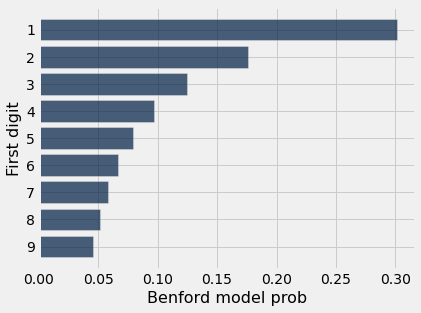

In [3]:
benford = Table().with_columns(
    'First digit', digits,
    'Benford model prob', benford_model)
benford.barh('First digit')

In [4]:
# You don't have to understand how this function works, since it uses Python features from beyond Data 8.
def first_digit(num):
    return int(str(num)[0])

In [5]:
first_digit(32)

3

In [6]:
first_digit(17719087)

1

In [7]:
# County populations from the census data
counties = Table.read_table('data/counties.csv')
counties = counties.where('SUMLEV', 50).select(5,6,9).relabeled(0,'State').relabeled(1,'County').relabeled(2,'Population')
counties.show(3)

State,County,Population
Alabama,Autauga County,54684
Alabama,Baldwin County,183216
Alabama,Barbour County,27336


In [8]:
first_digits = counties.apply(first_digit, 'Population')
counties = counties.with_column('First digit', first_digits)
counties.show(3)

State,County,Population,First digit
Alabama,Autauga County,54684,5
Alabama,Baldwin County,183216,1
Alabama,Barbour County,27336,2


In [9]:
num_counties = counties.num_rows

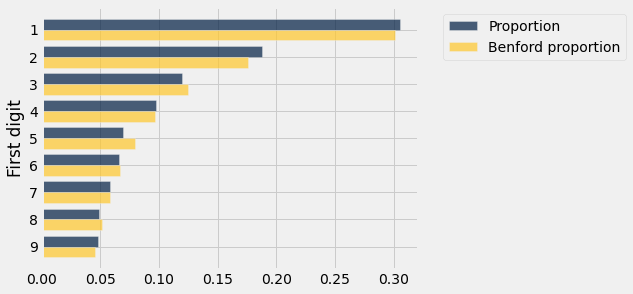

In [10]:
by_digit = counties.group('First digit')
proportions = by_digit.column('count')/num_counties
by_digit = by_digit.with_columns(
    'Proportion', proportions,
    'Benford proportion', benford_model
)
by_digit.drop('count').barh('First digit')

Null hypothesis:  the match up with  the bendfrd model is due to chance

Alternative hypothesis:  similarities in our counties' proportion and Benford's model are 

Test statistic: ___

Fill in the blank with "Bigger" or "Smaller":

___ values of the test statistic favor the alternative

In [17]:
observed_tvd = sum(abs(proportions - benford_model))/2
observed_tvd
print(proportions)
print(benford_model)

[0.30521961 0.18777849 0.11935073 0.09770847 0.06906429 0.06556334
 0.05824316 0.04901337 0.04805856]
[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


In [18]:
sample_proportions(num_counties, benford_model)

array([0.30840229, 0.16518141, 0.12062381, 0.09770847, 0.07638447,
       0.06333546, 0.06015277, 0.05665181, 0.05155952])

In [19]:
simulated_frequencies = sample_proportions(num_counties, benford_model)
tvd = sum(abs(simulated_frequencies - benford_model))/2
tvd

0.017556891668927793

In [20]:
def simulate_county_first_digits():
    simulated_frequencies = sample_proportions(num_counties, benford_model)
    tvd = sum(abs(simulated_frequencies - benford_model))/2
    return tvd

In [21]:
simulated_tvds = make_array()

for i in np.arange(10000):
    simulated_tvds = np.append(simulated_tvds, simulate_county_first_digits())

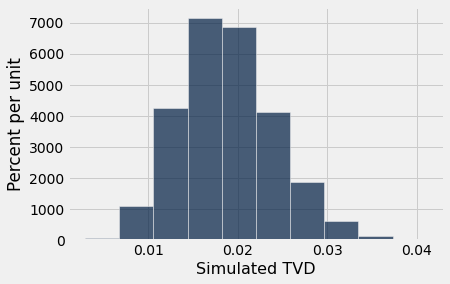

In [22]:
Table().with_column('Simulated TVD', simulated_tvds).hist(0)

In [23]:
np.count_nonzero(simulated_tvds >= observed_tvd) / 10000

0.4476

Are the data consistent with the null hypothesis?

## Example: sleep survey

In [24]:
survey = Table.read_table('data/sleep_survey.csv')
survey

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Sleep position
Second,6,10,7,Right-handed,On your back
Fourth or above,9,25,7,Right-handed,On your left side
First,7,5,8,Right-handed,On your stomach
Second,5,6,8,Right-handed,On your right side
Second,5,10,7,Right-handed,On your right side
Third,8,3,8,Right-handed,On your stomach
Third,8,2,5,Right-handed,On your left side
Second,7,5,6,Right-handed,On your right side
First,8,6,7,Right-handed,On your right side
First,4,5,7,Left-handed,On your right side


In [25]:
def simplify(sleep_position):
    if sleep_position == 'On your left side' or sleep_position == 'On your right side':
        return 'side'
    else:
        return 'back or stomach'
    
survey = survey.with_column(
    'position',
    survey.apply(simplify, 'Sleep position')
).select('position', 'Hours of sleep')

survey

position,Hours of sleep
back or stomach,7
side,7
back or stomach,8
side,8
side,7
back or stomach,8
side,5
side,6
side,7
side,7


In [27]:
survey.group('position', np.average)

position,Hours of sleep average
back or stomach,7.12792
side,7.0328


Null hypothesis:  Any differences between average hours of sleep between back/stomach sleepersor side sleepers is due to chance

Alternative hypothesis:  

Back/stomach sleepers on average get more sleep than side sleepers


Test statistic:

__ Average hours of sleep for back/stomach - Average hours of sleep for side __
__ Asolute value of (Average hours of sleepfor back/stomach - Average hours of sleep for side) __



Fill in the blank with "Bigger" or "Smaller":

__ Larger __ values of the test statistic favor the alternative

In [36]:
def compute_test_statistic(tbl):
    grouped = tbl.group('position', np.average)
    avgs = grouped.column('Hours of sleep average')
    return avgs.item(1) - avgs.item(0)

In [37]:
obs_test_stat = compute_test_statistic(survey)
obs_test_stat

-0.09512125823477291

In [38]:
random_labels = survey.sample(with_replacement=False).column('position')

In [39]:
def simulate_under_null():
    random_labels = survey.sample(with_replacement=False).column('position')
    relabeled_tbl = survey.with_column('position', random_labels)
    return compute_test_statistic(relabeled_tbl)


In [ ]:
simulated_diffs = make_array()
for i in np.arange(1000):
    null_stat = simulate_under_null()
    simulated_diffs = np.append(simulated_diffs, null_stat)

In [ ]:
Table().with_column('Simulated difference', simulated_diffs).hist(0)

In [ ]:
obs_test_stat

In [ ]:
np.mean(simulated_diffs <= obs_test_stat)

Are the data consistent with the null hypothesis?